# Strain mapping comparison of simulated Si/SiGe multilayer stacks using correlation and FCU-Net

This notebook compares simulated Si/SiGe multilayer stack strain measuerments from correlation and FCU-Net.

Note: This notebook can be run to compare both distorted and ideal multilayer stacks. In order to comare, please run the simulated strain mapping notebooks first and then load the output in this notebook as shown below.

### Acknowledgements

This tutorial was written by Joydeep Munshi (jmunshi@anl.gov) at Argonne National Lab.

### Version
Last updated on 2022-01-20 with py4DSTEM version 0.12.8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import py4DSTEM
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
# File path for the saved strain map outputs
#file_path_correlation = './Si_SiGe_ideal_analysis_corr.h5'
#file_path_fcunet = './Si_SiGe_ideal_analysis.h5'

file_path_correlation = './Si_SiGe_distorted_analysis_corr.h5'
file_path_fcunet = './Si_SiGe_distorted_analysis.h5'

In [4]:
# Load the strain maps for correlation and fcu-net for comparison
strainmap_ROI_corr = py4DSTEM.io.read(file_path_correlation, data_id='strain_map_rotated');
strainmap_ROI_fcunet = py4DSTEM.io.read(file_path_fcunet, data_id='strain_map_rotated');

In [5]:
# get the ideal strain profile from csv file
import pandas as pd
strain_prof = pd.read_csv('./strain_profile_simulated.csv')
probe_step_x = strain_prof['position']
strain_ideal_e_xx =  strain_prof['strain']
strain_ideal_e_yy = np.zeros_like(probe_step_x)

In [6]:
# Note to save time, we will just manually specify the probe positions
probe_step_x_ = np.arange(0,strainmap_ROI_corr.data.shape[0]) * 4.033104 + 100.82759

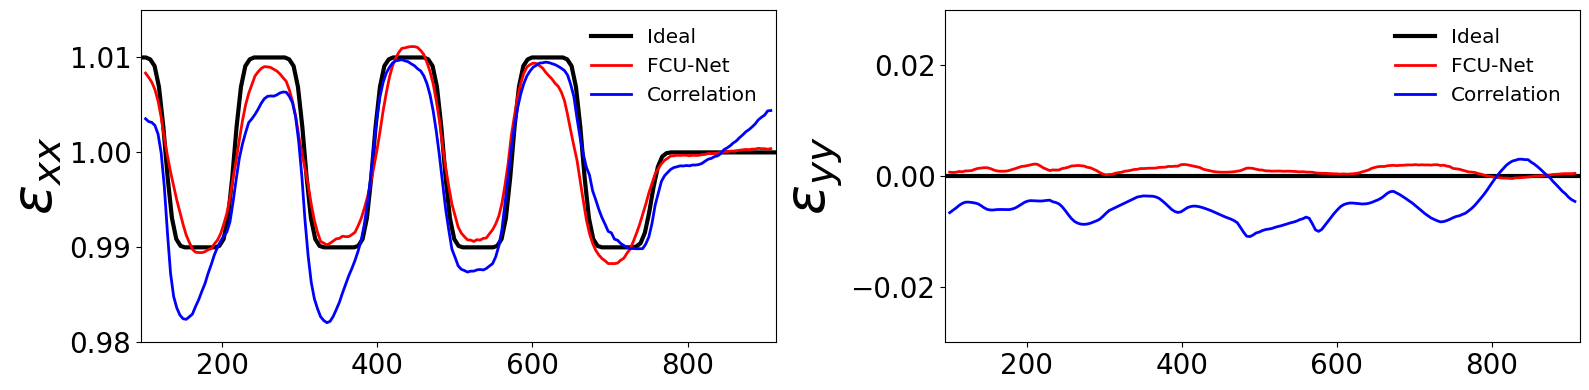

In [12]:
# Get mean E_xx and E_yy strain maps along the perpendicular to growth direction
strain_mean_e_xx_fcunet = np.mean(strainmap_ROI_fcunet.slices['e_xx'],axis=1)
strain_mean_e_yy_fcunet = np.mean(strainmap_ROI_fcunet.slices['e_yy'],axis=1)

strain_mean_e_xx_corr = np.mean(strainmap_ROI_corr.slices['e_xx'],axis=1)
strain_mean_e_yy_corr = np.mean(strainmap_ROI_corr.slices['e_yy'],axis=1)


# Plotting
fig, axs = plt.subplots(1,2,figsize=(16,4))

# strain along x direction
axs[0].plot(
    probe_step_x, 
    strain_ideal_e_xx,
    color='k',
    linestyle='-', linewidth=3, label = 'Ideal');
axs[0].plot(
    probe_step_x_, 
    strain_mean_e_xx_fcunet+1,
    color='r', linewidth=2, label = 'FCU-Net')
axs[0].plot(
    probe_step_x_, 
    strain_mean_e_xx_corr+1,
    color='b', linewidth=2,label = 'Correlation')
axs[0].set_xlim(95,914)
axs[0].set_ylim(0.98,1.015)

# strain along y direction
axs[1].plot(
    probe_step_x, 
    strain_ideal_e_yy,
    color='k',
    linestyle='-',linewidth=3, label = 'Ideal');
axs[1].plot(
    probe_step_x_, 
    strain_mean_e_yy_fcunet,
    color='r', linewidth=2, label = 'FCU-Net')
axs[1].plot(
    probe_step_x_, 
    strain_mean_e_yy_corr,
    color='b', linewidth=2,label = 'Correlation')
axs[1].set_xlim(95,914)
axs[1].set_ylim(-0.03, 0.03)
axs[0].legend(frameon=False, fontsize = 'x-large')
axs[1].legend(frameon=False, fontsize = 'x-large')
axs[0].locator_params(axis="y", nbins=4)
axs[1].locator_params(axis="y", nbins=4)
axs[0].locator_params(axis="x", nbins=8)
axs[1].locator_params(axis="x", nbins=8)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
#ax.set_yticklabels(xlabels, fontsize= )
axs[0].set_ylabel(r'$\epsilon_{xx}$', fontsize = 40)
axs[1].set_ylabel(r'$\epsilon_{yy}$', fontsize = 40)
plt.tight_layout()
#fig.savefig('./paper_figs/strain_profile_exp_thin.pdf', dpi=600)
plt.show()